# Ejercicios 4

## Entrega Jueves 29 de Noviembre

1. Generar datos con “corrimiento al rojo” para los datos del Anillo en 2d. Para ello debemos crear mapa de velocidad: 
en una vecindad de $L/10$ de cada punto "pivote" en los datos, encontrar el punto más cercano y generar una velocidad 
para este punto pivote en la dirección del punto más cercano proporcional a su distancia $(v = 0.1dist)$. 
Guardar el nuevo punto con coordenadas

$$
\mathbf{r}=(x, y+v\cdot\hat{j})
$$

Sea $\vec{r_1}$ mi punto pivote y $\vec{r_2}$ el punto más cercano a $\vec{r_1}$. Queremos que $\vec{v}$ vaya en la dirección de $(\vec{r_2} - \vec{r_1})$ (unitario), por lo que

$$
\vec{v}\cdot\hat{j} = v\frac{(\vec{r_2} - \vec{r_1})}{|\vec{r_2} - \vec{r_1}|}\cdot\hat{j} = (0.1dist)\frac{(\vec{r_2} - \vec{r_1})}{dist}\cdot\hat{j} = 0.1(y_2 - y_1)
$$

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import distros
from scipy import spatial

In [60]:
n_points = 3
r_int = 290.0
r_ext = 300.0
box_size = 1000.0
cte_prop = 5.0

In [61]:
x_anillo, y_anillo = distros.anillo_dist(n_points, r_int, r_ext, box_size / 2.0, box_size / 2.0)
points = np.vstack((x_anillo, y_anillo)).T
y_redshift = []

[[537.48004405 210.94634361]
 [357.43719238 245.89295697]
 [200.94700486 520.51511963]]


In [64]:
for pivot in points:
    dist_of_nearst_pt, index_of_nearst_pt = spatial.KDTree(points).query(pivot)
    y1 = pivot[1]
    y2 = points[index_of_nearst_pt][1]
    print(y1, y2)
    y_new = y1 + cte_prop * (y2 - y1)
    y_redshift.append(y_new)

210.94634360637093 210.94634360637093
245.89295696985087 245.89295696985087
520.5151196252516 520.5151196252516


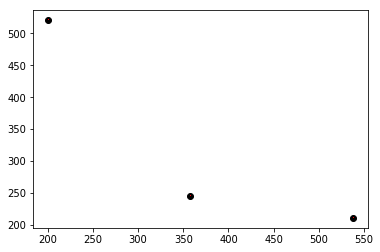

In [63]:
#plt.xlim([200.0, 800.0])
#plt.ylim([600.0, 800.0])
plt.plot(x_anillo, y_anillo, 'ko', label = 'Punto originales')
plt.plot(x_anillo, y_redshift, 'r,', label = 'Puntos con corrimiento al rojo')
#plt.legend(fontsize = 16)

2. Cambiar el código de la función de correlación con estimador de Landy-Salay, para que sea anisotrópico y guarde la componente  de cada distancia en X y Y. 

   a) Con este código calcular la función de correlación anisotrópica del ejercicio anterior 
   y graficarla como gráfica de densidad en $2d$ (se puede usar imshow de matplotlib).
   
   b) (BONUS) Descomponer en la base de Legendre para encontrar el monopolo, cuadrupolo y hexadecapolo. 
   Graficarlos todos en un mismo plot. [Para realizar este ejercicio debes cambiar la función de correlación a coordenadas polares]